In [1]:
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
import numpy as np

In [2]:
TRAINING_DIR = "/Users/User/Desktop/DATA/Train"
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

VALIDATION_DIR = "/Users/User/Desktop/DATA/Test"
validation_datagen = ImageDataGenerator(rescale = 1./255)
train_generator = training_datagen.flow_from_directory(
	TRAINING_DIR,
	target_size=(224,224),
	class_mode='categorical',
    batch_size=64
)

validation_generator = validation_datagen.flow_from_directory(
	VALIDATION_DIR,
	target_size=(224,224),
	class_mode='categorical',
    batch_size=64
)

Found 1774 images belonging to 3 classes.
Found 288 images belonging to 3 classes.


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(256, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])


model.summary()

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 24, 24, 256)      

In [5]:
history = model.fit(train_generator, epochs=15, verbose = 1)

Epoch 1/15
28/28 [==============================] - 82s 3s/step - loss: 1.1362 - accuracy: 0.5321
Epoch 2/15
28/28 [==============================] - 89s 3s/step - loss: 0.5314 - accuracy: 0.7706
Epoch 3/15
28/28 [==============================] - 91s 3s/step - loss: 0.4704 - accuracy: 0.7864
Epoch 4/15
28/28 [==============================] - 93s 3s/step - loss: 0.5103 - accuracy: 0.7903
Epoch 5/15
28/28 [==============================] - 87s 3s/step - loss: 0.4453 - accuracy: 0.8145
Epoch 6/15
28/28 [==============================] - 91s 3s/step - loss: 0.4353 - accuracy: 0.8134
Epoch 7/15
28/28 [==============================] - 91s 3s/step - loss: 0.4253 - accuracy: 0.8236
Epoch 8/15
28/28 [==============================] - 92s 3s/step - loss: 0.4151 - accuracy: 0.8320
Epoch 9/15
28/28 [==============================] - 92s 3s/step - loss: 0.4516 - accuracy: 0.8038
Epoch 10/15
28/28 [==============================] - 94s 3s/step - loss: 0.4032 - accuracy: 0.8219
Epoch 11/15
28/28 [

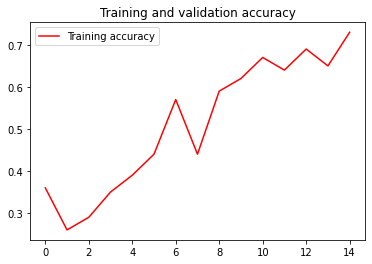

<Figure size 432x288 with 0 Axes>

In [23]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
import tensorflow_datasets as tfds
import tensorflow as tf
from sklearn.metrics import confusion_matrix



In [13]:
import numpy as np
from keras.preprocessing import image
import os
from PIL import Image, ImageOps
import tensorflow.keras
images = os.listdir("/Users/User/Desktop/DATA/Validation")

img_path = '/Users/User/Desktop/DATA/Valiation/Unripe/IMG_2054.JPG'

def model_predict(img_path):
    np.set_printoptions(suppress=True)
    data = np.ndarray(shape=(1, 224, 224, 3), dtype=np.float32)
    image = Image.open(img_path)
    size = (224, 224)
    image = ImageOps.fit(image, size, Image.ANTIALIAS)
    image_array = np.asarray(image)
    normalized_image_array = (image_array.astype(np.float32) / 127.0) - 1
    data[0] = normalized_image_array
    model = tensorflow.keras.models.load_model('papaya_model_tf.h5')
    preds = ""
    prediction = model.predict(data)
    if np.argmax(prediction)>=0 and np.argmax(prediction)<1:
        preds = f"Medium"
    elif np.argmax(prediction)==1:
        preds = f"ripe"
    else :
        preds = f"unripe"

    return print(preds)

#not use

In [20]:
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("/Users/User/Desktop/DATA/DATA/testing")



# for i in images:
#     print()
#     # predicting images
path = '/Users/User/Desktop/DATA/DATA/testing/test6.jpg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
    
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)
#[[medium ripe unripe]]

/Users/User/Desktop/DATA/DATA/testing/test6.jpg
[[0. 0. 1.]]


In [21]:
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("/Users/User/Desktop/DATA/DATA/testing")



# for i in images:
#     print()
#     # predicting images
path = '/Users/User/Desktop/DATA/DATA/testing/test7.jpg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
    
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)
#[[medium ripe unripe]]

/Users/User/Desktop/DATA/DATA/testing/test7.jpg
[[0.04198787 0.         0.9580121 ]]


In [22]:
import numpy as np
from keras.preprocessing import image
import os

images = os.listdir("/Users/User/Desktop/DATA/DATA/testing")



# for i in images:
#     print()
#     # predicting images
path = '/Users/User/Desktop/DATA/DATA/testing/test8.jpg'
img = image.load_img(path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
    
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(path)
print(classes)
#[[medium ripe unripe]]

/Users/User/Desktop/DATA/DATA/testing/test8.jpg
[[0. 0. 1.]]


In [6]:
model.save('papaya_model_tf.h5')